In [3]:
import pandas as pd
import math
import ast
import torch

In [4]:
# GPU가 사용 가능한지 확인 및 사용
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [2]:
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')


Mounted at /content/drive


In [35]:

# 파일 경로
file_path = '/content/drive/My Drive/Colab Notebooks/CJ_Hackathon/Data/'

#로드
df = pd.read_csv(file_path + '(test)perfume_data_combined.csv')


In [36]:
df.columns

Index(['name', 'company', 'image', 'for_gender', 'rating', 'number_votes',
       'main accords', 'description', 'top notes', 'middle notes',
       'base notes', 'longevity', 'sillage', 'gender_vote', 'price value'],
      dtype='object')

In [37]:
#사용예정 컬럼 추출
df = df[['name','main accords', 'description', 'top notes', 'middle notes','base notes']]

# Preprocessing

'main accords'컬럼 전처리

In [38]:
df['main accords'].head()

0    {'woody': 100.0, 'sweet': 92.6987, 'warm spicy...
1    {'white floral': 100.0, 'citrus': 60.4322, 'tu...
2    {'vanilla': 100.0, 'aromatic': 71.4216, 'sweet...
3    {'woody': 100.0, 'musky': 72.7229, 'amber': 53...
4    {'aromatic': 100.0, 'marine': 93.2493, 'citrus...
Name: main accords, dtype: object

In [39]:
def process_accords(accords):
    # 딕셔너리로 변환
    accords_dict = ast.literal_eval(accords)

    result = []

    # 값에 39를 나누고 반올림
    for i, (key, value) in enumerate(accords_dict.items()):
        if i >= 2:  # 두 번째 요소까지만 활용
            break
        repeat_count = round(value / 39)

        # 반올림한 횟수만큼 키를 반복하여 결과 리스트에 추가
        result.extend([key] * repeat_count)

    return result


# 함수적용
df['main accords_pre'] = df['main accords'].apply(process_accords)

df.head()


,name,main accords,description,top notes,middle notes,base notes,main accords_pre
0,Angels' Share,"{'woody': 100.0, 'sweet': 92.6987, 'warm spicy...",Angels' Share by By Kilian is a Oriental Vanil...,['Cognac'],"['Cinnamon', 'Tonka Bean', 'Oak']","['Praline', 'Vanilla', 'Sandalwood']","[woody, woody, woody, sweet, sweet]"
1,My Way,"{'white floral': 100.0, 'citrus': 60.4322, 'tu...",My Way by Giorgio Armani is a Floral fragrance...,"['Orange Blossom', 'Bergamot']","['Tuberose', 'Indian Jasmine']","['White Musk', 'Madagascar Vanilla', 'Virginia...","[white floral, white floral, white floral, cit..."
2,Libre Intense,"{'vanilla': 100.0, 'aromatic': 71.4216, 'sweet...",Libre Intense by Yves Saint Laurent is a Orien...,"['Lavender', 'Mandarin Orange', 'Bergamot']","['Lavender', 'Tunisian Orange Blossom', 'Jasmi...","['Madagascar Vanilla', 'Tonka Bean', 'Ambergri...","[vanilla, vanilla, vanilla, aromatic, aromatic]"
3,Dior Homme 2020,"{'woody': 100.0, 'musky': 72.7229, 'amber': 53...",Dior Homme 2020 by Christian Dior is a Woody f...,"['Bergamot', 'Pink Pepper', 'elemi']","['Cashmere Wood', 'Atlas Cedar', 'Patchouli']","['Iso E Super', 'Haitian Vetiver', 'White Musk']","[woody, woody, woody, musky, musky]"
4,Acqua di Giò Profondo,"{'aromatic': 100.0, 'marine': 93.2493, 'citrus...",Acqua di Giò Profondo by Giorgio Armani is a A...,"['Sea Notes', 'Aquozone', 'Bergamot', 'Green M...","['Rosemary', 'Cypress', 'Lavender', 'Mastic or...","['Mineral notes', 'Musk', 'Patchouli', 'Amber']","[aromatic, aromatic, aromatic, marine, marine]"


Clean Text

In [10]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

In [41]:
# 어간 추출
def stem_words(text):
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text

# 소문자 변환
def make_lower_case(text):
    return [word.lower() for word in text]

# 불용어 제거
def remove_stop_words(text):
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# 문장부호 제거
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\b\w+\b')
    text = tokenizer.tokenize(text)
    text = " ".join(text)

# 대괄호 제거
def remove_brackets(text):
    return text.replace("[", "").replace("]", "")



In [42]:
df['name_pre'] = df['name'].apply(make_lower_case)
df['name_pre'] = df['name'].apply(remove_stop_words)
df['name_pre'] = df['name'].apply(remove_punctuation)
df['name_pre'] = df['name'].apply(stem_words)
df['name_pre'] = df['name'].apply(remove_brackets)

In [43]:
df['main accords_pre'] = df['main accords_pre'].astype(str)

df['main accords_pre_2'] = df['main accords_pre'].apply(make_lower_case)
df['main accords_pre_2'] = df['main accords_pre'].apply(remove_stop_words)
df['main accords_pre_2'] = df['main accords_pre'].apply(remove_punctuation)
df['main accords_pre_2'] = df['main accords_pre'].apply(stem_words)
df['main accords_pre_2'] = df['main accords_pre'].apply(remove_brackets)


In [44]:
df['top notes_pre'] = df['top notes'].apply(stem_words)
df['top notes_pre'] = df['top notes'].apply(make_lower_case)
df['top notes_pre'] = df['top notes'].apply(remove_stop_words)
df['top notes_pre'] = df['top notes'].apply(remove_punctuation)
df['top notes_pre'] = df['top notes'].apply(remove_brackets)

In [45]:
df['middle notes_pre'] = df['middle notes'].apply(stem_words)
df['middle notes_pre'] = df['middle notes'].apply(make_lower_case)
df['middle notes_pre'] = df['middle notes'].apply(remove_stop_words)
df['middle notes_pre'] = df['middle notes'].apply(remove_punctuation)
df['middle notes_pre'] = df['middle notes'].apply(remove_brackets)

In [46]:
df['base notes_pre'] = df['base notes'].apply(stem_words)
df['base notes_pre'] = df['base notes'].apply(make_lower_case)
df['base notes_pre'] = df['base notes'].apply(remove_stop_words)
df['base notes_pre'] = df['base notes'].apply(remove_punctuation)
df['base notes_pre'] = df['base notes'].apply(remove_brackets)

In [55]:
df['description_pre'] = df['description'].apply(stem_words)
df['description_pre'] = df['description'].apply(make_lower_case)
df['description_pre'] = df['description'].apply(remove_stop_words)
df['description_pre'] = df['description'].apply(remove_punctuation)
df['description_pre'] = df['description'].apply(remove_brackets)

In [47]:
df_nltk = df[['name_pre', 'main accords_pre_2',
              'top notes_pre','middle notes_pre','base notes_pre']]

# Word2vec imbedding (using TF-IDF)

TF-IDF 벡터화를 이용하면 단어의 빈도가 높고 문서 간에 잘 분포되어 있는 단어일수록 높은 가중치를 가지게 된다. 이렇게 계산된 TF-IDF 가중치를 Word2Vec 임베딩 벡터에 곱하면, 가중치가 큰 단어의 임베딩 벡터 값이 더 크게 반영되어 분류 모델 성능의 향상을 기대할 수 있을 것이다
.

In [54]:
df['base notes_pre'].head()

0                   'Praline', 'Vanilla', 'Sandalwood'
1    'White Musk', 'Madagascar Vanilla', 'Virginian...
2    'Madagascar Vanilla', 'Tonka Bean', 'Ambergris...
3       'Iso E Super', 'Haitian Vetiver', 'White Musk'
4        'Mineral notes', 'Musk', 'Patchouli', 'Amber'
Name: base notes_pre, dtype: object

In [57]:
df_nltk['full_document'] = df_nltk['name_pre'] + ' ' \
+ df_nltk['main accords_pre_2'] + ' ' \
+ df_nltk['top notes_pre'] + ' ' \
+ df_nltk['middle notes_pre'] + ' ' \
+ df_nltk['base notes_pre']


<ipython-input-57-4bc16b9fbc4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nltk['full_document'] = df_nltk['name_pre'] + ' ' \


## TF-IDF 가중치 계산

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer


# 'full_document' 컬럼으로부터 문장 리스트 생성
sentences = df_nltk['full_document'].tolist()

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)

# 단어별 TF-IDF 가중치 계산
word2weight = {word: tfidf_matrix.getcol(idx).sum() for word, idx in vectorizer.vocabulary_.items()}


## Word2vec을 통한 연관단어 임베딩

In [60]:
from gensim.models import Word2Vec
import numpy as np


# Word2Vec 모델 학습
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# 단어 임베딩 추출
word_vectors = model.wv

# TF-IDF 가중치 적용하여 임베딩 벡터 추출
X = []
for sentence in sentences:
    embedding = []
    for word in sentence:
        if word in word_vectors.key_to_index:  # 단어가 Word2Vec 모델에 있는지 확인
            # TF-IDF 가중치 적용하여 단어 임베딩 계산 (단어가 없으면 기본값 1.0 사용)
            weighted_embedding = word_vectors.get_vector(word) * word2weight.get(word, 1.0)
            embedding.append(weighted_embedding)
    # 각 문장에 대해 단어 임베딩의 평균 계산 (단어가 하나도 없는 경우 제외)
    if embedding:
        average_embedding = np.mean(embedding, axis=0)
        X.append(average_embedding)

# Clustering

## 최적의 K를 위한 Elbow Point 확인

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

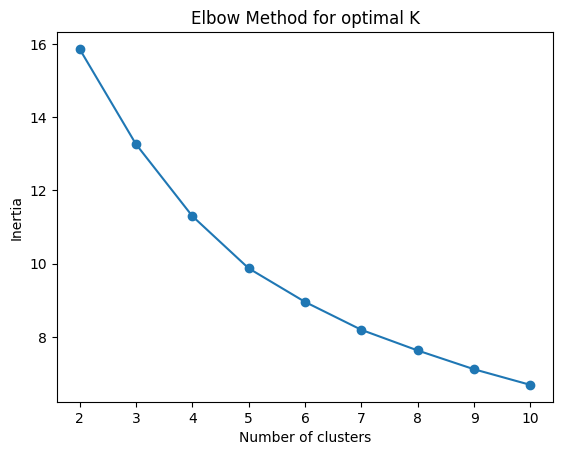

In [62]:
# 군집 개수 범위 설정
min_k = 2  # 최소 군집 개수
max_k = 10  # 최대 군집 개수

# 군집 내 제곱 합 기록
inertia_values = []

for k in range(min_k, max_k + 1):
    # K-means 군집화
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# 군집 개수에 따른 군집 내 제곱 합 시각화
plt.plot(range(min_k, max_k + 1), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for optimal K')
plt.show()


X축에 따라 Y축의 감소율이 크게 작아지는 5를 K로 설정


## K-means Clustering

In [69]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
#원본 df에 레이블링
df['Cluster'] = clusters

In [71]:
#원본 컬럼 및 군집 레이블 따로 추출
df_save = df[['Cluster','name','main accords', 'description', 'top notes', 'middle notes','base notes']]

In [72]:
#같은 cluster 값끼리 볼 수 있도록 정렬
df_sorted = df_save.sort_values(by='Cluster')

In [73]:
df_sorted.to_csv('Ver3(TF_IDF+word2vec)_Test_result_clustering.csv')